In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('cpu')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [10, 10], learning_rate = 0.001, calibration_threshold = .03)

initial loss:  1.773250699043274
final loss:  -3.372697353363037


End2end test MAPE:  0.35441056


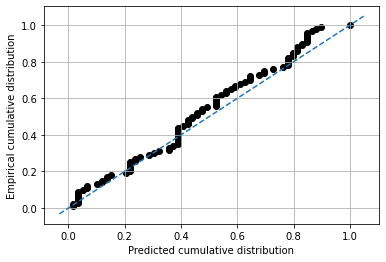

End2end test calibration error when step size is 0.001:  2.6823893995978176
End2end test calibration error when step size is 0.01:  0.2585162309681128
End2end test calibration error when step size is 0.1:  0.02041080149382362


In [5]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [4]:
end2end_model = end2end_crps.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [10, 10], learning_rate = 0.001, calibration_threshold = .03)

initial loss:  0.9993672966957092
252 0.042888888888888865 tensor(-2.9741, grad_fn=<MeanBackward0>) tensor(0.1057, grad_fn=<MeanBackward0>)
254 0.05119999999999997 tensor(-2.9632, grad_fn=<MeanBackward0>) tensor(0.1059, grad_fn=<MeanBackward0>)
256 0.0584444444444444 tensor(-2.9472, grad_fn=<MeanBackward0>) tensor(0.1060, grad_fn=<MeanBackward0>)
258 0.07791111111111108 tensor(-2.9211, grad_fn=<MeanBackward0>) tensor(0.1063, grad_fn=<MeanBackward0>)
260 0.06595555555555553 tensor(-2.9416, grad_fn=<MeanBackward0>) tensor(0.1059, grad_fn=<MeanBackward0>)
262 0.051288888888888856 tensor(-2.9782, grad_fn=<MeanBackward0>) tensor(0.1053, grad_fn=<MeanBackward0>)
264 0.04435555555555553 tensor(-3.0060, grad_fn=<MeanBackward0>) tensor(0.1048, grad_fn=<MeanBackward0>)
266 0.0417333333333333 tensor(-3.0230, grad_fn=<MeanBackward0>) tensor(0.1045, grad_fn=<MeanBackward0>)
268 0.038622222222222204 tensor(-3.0322, grad_fn=<MeanBackward0>) tensor(0.1043, grad_fn=<MeanBackward0>)
270 0.04382222222222

426 0.053644444444444425 tensor(-3.1953, grad_fn=<MeanBackward0>) tensor(0.0976, grad_fn=<MeanBackward0>)
428 0.05728888888888885 tensor(-3.1846, grad_fn=<MeanBackward0>) tensor(0.0977, grad_fn=<MeanBackward0>)
430 0.060799999999999965 tensor(-3.1812, grad_fn=<MeanBackward0>) tensor(0.0977, grad_fn=<MeanBackward0>)
432 0.059777777777777735 tensor(-3.1839, grad_fn=<MeanBackward0>) tensor(0.0977, grad_fn=<MeanBackward0>)
434 0.04484444444444441 tensor(-3.2048, grad_fn=<MeanBackward0>) tensor(0.0974, grad_fn=<MeanBackward0>)
436 0.033377777777777756 tensor(-3.2208, grad_fn=<MeanBackward0>) tensor(0.0971, grad_fn=<MeanBackward0>)
456 0.03164444444444443 tensor(-3.2337, grad_fn=<MeanBackward0>) tensor(0.0965, grad_fn=<MeanBackward0>)
458 0.04484444444444444 tensor(-3.2133, grad_fn=<MeanBackward0>) tensor(0.0967, grad_fn=<MeanBackward0>)
460 0.0572444444444444 tensor(-3.1993, grad_fn=<MeanBackward0>) tensor(0.0968, grad_fn=<MeanBackward0>)
462 0.05857777777777775 tensor(-3.1983, grad_fn=<Mea

End2end test MAPE:  0.35897467
End2end test RMSE:  37.977978


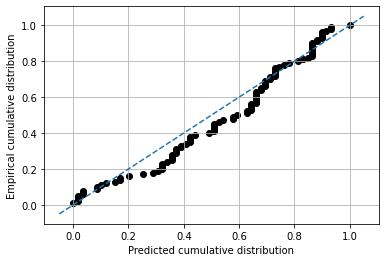

End2end test calibration error when step size is 0.001:  3.853630422292443
End2end test calibration error when step size is 0.01:  0.3793205975294454
End2end test calibration error when step size is 0.1:  0.042818155702384356


In [5]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))